
<h2><center>Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install -q orbit-ml
!pip install -q prophet
!pip install -q sktime[all_extras]

In [1]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

plt.style.use('ggplot')

## Задание 1 (2 балла). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекоммендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



Загрузим и предобработаем первый ряд

In [2]:
ts1_monthly = pd.read_csv('Imports Crude Oil.csv.')
ts1_monthly.columns = ['Date', 'Imports']
ts1_monthly['Date'] = pd.PeriodIndex(ts1_monthly.Date, freq='M')
ts1_monthly = ts1_monthly.set_index('Date').asfreq('M')

ts1_monthly.head()

,Imports
Date,
2009-01,317275
2009-02,262339
2009-03,303897
2009-04,285934
2009-05,281147


Загрузим и предобработаем второй ряд

In [3]:
ts2_daily = pd.read_csv('DailyDelhiClimateTrain.csv', index_col=['date'], parse_dates=['date'])[['meantemp']].asfreq("D")

ts2_daily.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [ ]:
# сделаем разбиение на train/test
from sktime.forecasting.model_selection import temporal_train_test_split

ts1_monthly_train , ts1_monthly_test = temporal_train_test_split(ts1_monthly, test_size=0.2)
ts2_daily_train , ts2_daily_test = temporal_train_test_split(ts2_daily, test_size=0.2)

In [ ]:
ts1_monthly_train.shape, ts1_monthly_test.shape

((116, 1), (29, 1))

In [ ]:
ts2_daily_train.shape, ts2_daily_test.shape,

((1169, 1), (293, 1))

## Задание 2. Анализ временных рядов (1 балла).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики автокорреляционных функций для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

Временной ряд с месячной частотностью 

<Figure size 1296x576 with 0 Axes>

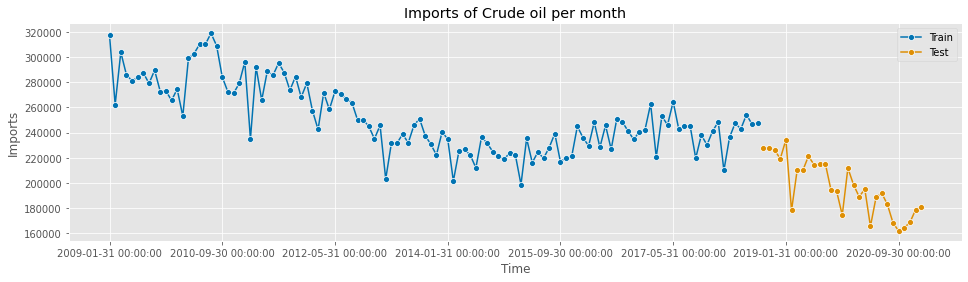

In [ ]:
from sktime.utils.plotting import plot_series

plt.figure(figsize=(18, 8))
plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, labels=["Train", "Test"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

Временной ряд с дневной частотностью 

<Figure size 1296x576 with 0 Axes>

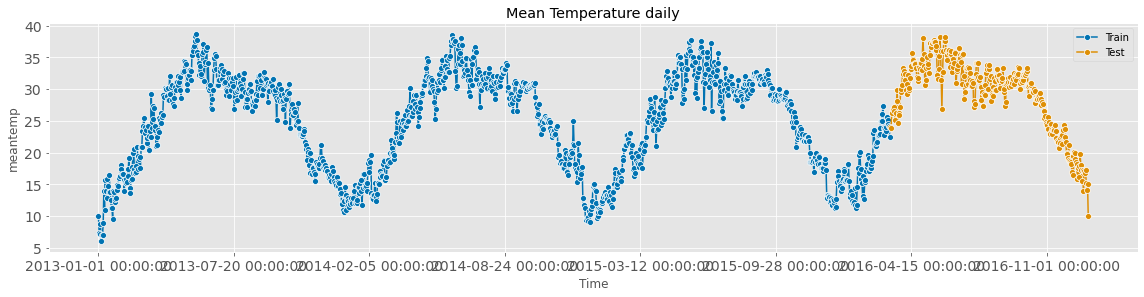

In [ ]:
plt.figure(figsize=(18, 8))
plot_series(ts2_daily_train.meantemp, ts2_daily_test.meantemp, labels=["Train", "Test"])
plt.title('Mean Temperature daily')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tight_layout() 
plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')

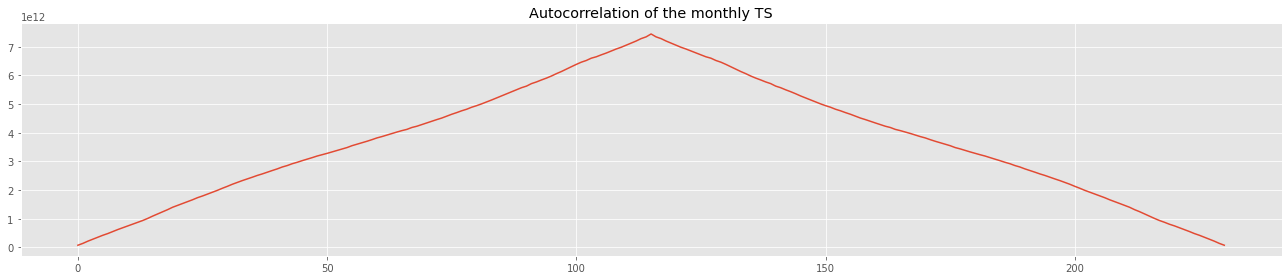

In [ ]:
autocorr_1 = np.correlate(ts1_monthly_train.Imports, ts1_monthly_train.Imports, mode='full')

plt.figure(figsize=(18, 4))
plt.plot(autocorr_1)
plt.title('Autocorrelation of the monthly TS')
plt.tight_layout() 
plt.show()

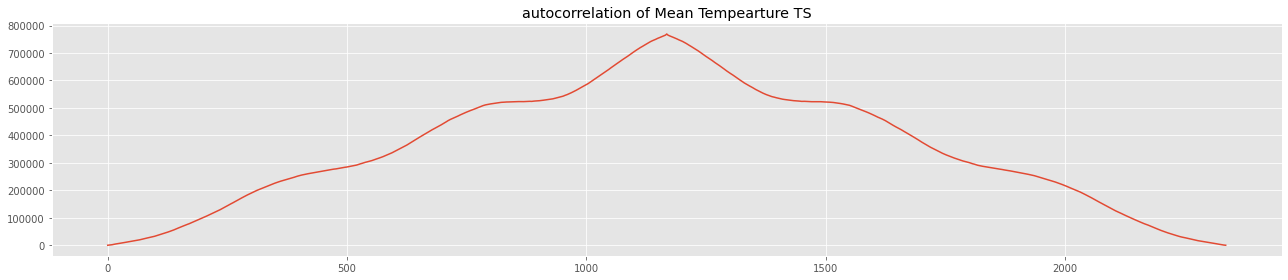

In [ ]:
autocorr_2 = np.correlate(ts2_daily_train.meantemp, ts2_daily_train.meantemp, mode='full')

plt.figure(figsize=(18, 4))
plt.plot(autocorr_2)
plt.title('autocorrelation of Mean Tempearture TS')
plt.tight_layout() 
plt.show()

In [ ]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

Наложение для первого ряда

In [ ]:
colors = sns.color_palette("tab10")

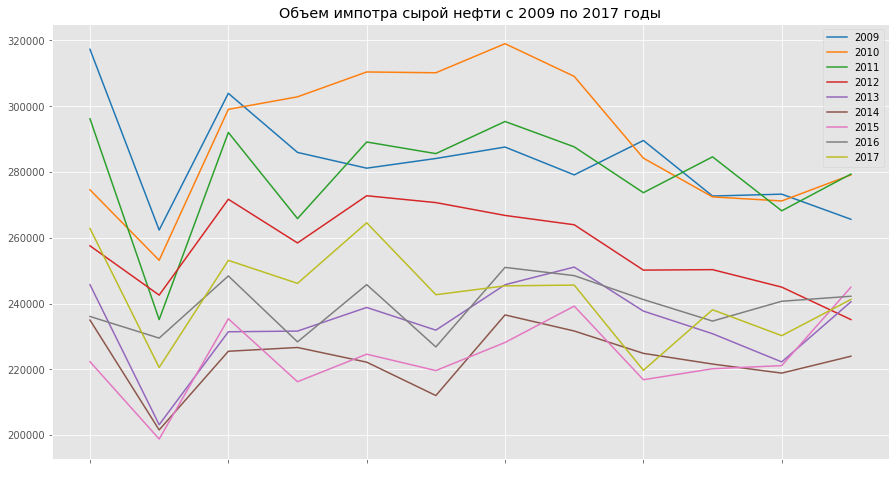

In [ ]:
years = []
for i in range(0, 97, 12):
    y = ts1_monthly_train.Imports.values[i: i+12]
    years.append(y)

plt.figure(figsize=(15, 8))
for i in range(9):
    k = i + 9
    year = f'20{k}' if k // 10 == 1 else f'200{k}'
    plt.plot(years[i], c=colors[i], label=year)

plt.title('Объем импотра сырой нефти с 2009 по 2017 годы')
plt.legend()
plt.xticks(color='w')
plt.show()

Наложение для второго ряда

In [ ]:
p1 = ts2_daily_train.iloc[:365] # отделения 2013 года
p2 = ts2_daily_train.iloc[365:365 + 365] # отделения 2014 года
p3 = ts2_daily_train.iloc[365 + 365 : 365 + 365 + 365] # отделения 2015 года

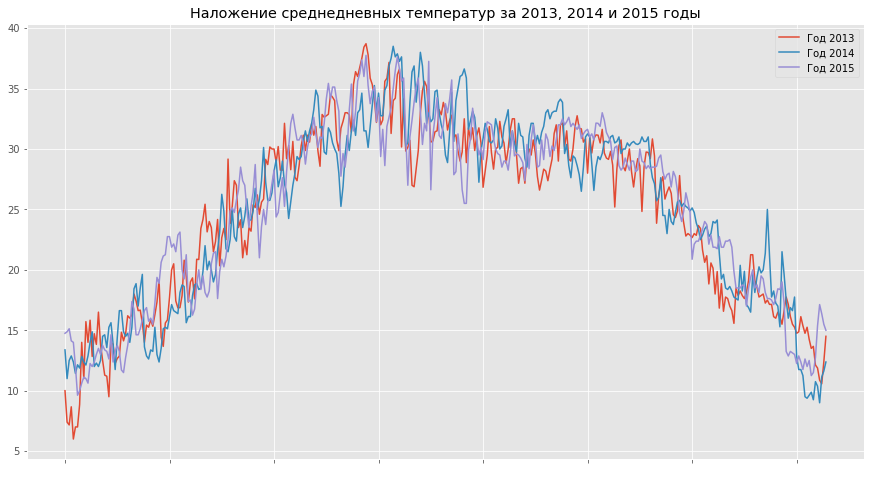

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(p1.meantemp.values, label='Год 2013')
plt.plot(p2.meantemp.values, label='Год 2014')
plt.plot(p3.meantemp.values, label='Год 2015')
plt.title('Наложение среднедневных температур за 2013, 2014 и 2015 годы')
plt.legend()
plt.xticks(color='w')
plt.show()

## Задание 3. Предсказание месячного временного ряда (4.5 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.


### NaiveForecaster из sktime (0.5 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(ts1_monthly_test.index, is_relative=False)
fh

ForecastingHorizon(['2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12', '2021-01'],
            dtype='period[M]', name='Date', freq='M', is_relative=False)

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
NF_1 = NaiveForecaster(strategy='last')
NF_1.fit(ts1_monthly_train.Imports)
monthly_pred = NF_1.predict(fh=fh)

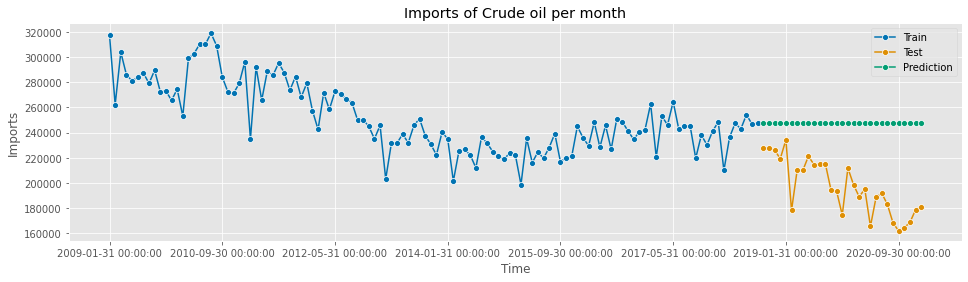

In [ ]:
plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, monthly_pred, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте метрики на test
from sklearn.metrics import mean_absolute_error as MAE

MAE(monthly_pred, ts1_monthly_test.Imports.values)

50757.8275862069

In [ ]:
NF_2 = NaiveForecaster(strategy='last', sp=12)
NF_2.fit(ts1_monthly_train.Imports)
monthly_pred = NF_2.predict(fh=fh)

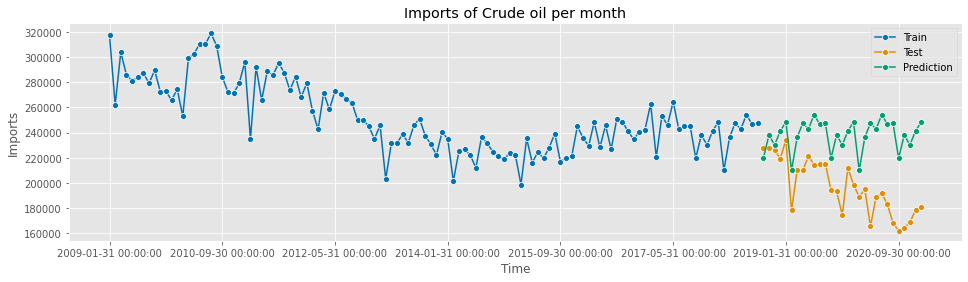

In [ ]:
plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, monthly_pred, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
MAE(monthly_pred, ts1_monthly_test.Imports.values)

41728.44827586207

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
sarima = ARIMA(order=(1, 1, 1,), seasonal_order=(1, 0, 0, 12))
sarima.fit(ts1_monthly_train.Imports)
monthly_pred = sarima.predict(fh=fh)

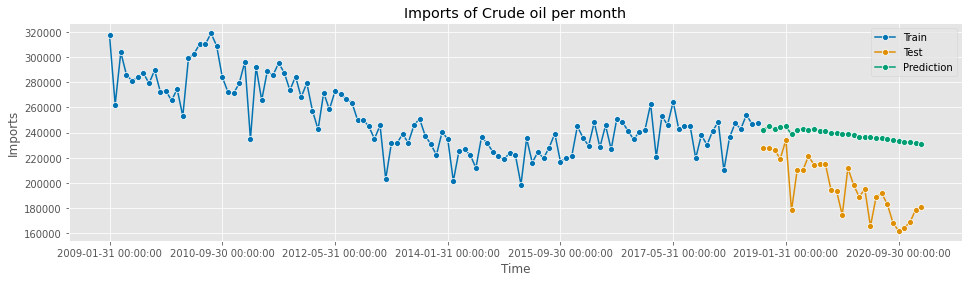

In [ ]:
plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, monthly_pred, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте метрики на test
MAE(monthly_pred, ts1_monthly_test.Imports.values)

41728.44827586207

In [ ]:
import pmdarima as pm

autoarima = pm.auto_arima(

    ts1_monthly_train.Imports,
    start_p=1, start_q=1,
    max_p=5, max_q=5, 
    
    seasonal=True, m=12,
    start_P=0, start_Q=0,
    max_P =2 , max_Q = 2,
    
    max_D=2, max_d=2,
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',    
    
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=False, 
    n_fits=100,
    information_criterion='bic',
    out_of_sample_size=7
)

 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=2600.352, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : BIC=2595.189, Time=0.17 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : BIC=2588.711, Time=0.59 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : BIC=2591.727, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : BIC=2584.553, Time=0.26 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : BIC=2589.176, Time=0.69 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : BIC=2586.417, Time=0.41 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : BIC=2589.113, Time=0.84 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : BIC=2590.959, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : BIC=2575.392, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=2569.064, Time=0.23 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : BIC=2564.332, Time=0.62 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : BIC=2566.405, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : BIC=2565.357, Time=0.42 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : BIC=2568.619, Time=1.62

In [ ]:
y_pred = autoarima.predict(n_periods=29)
monthly_pred = pd.Series(y_pred, fh)

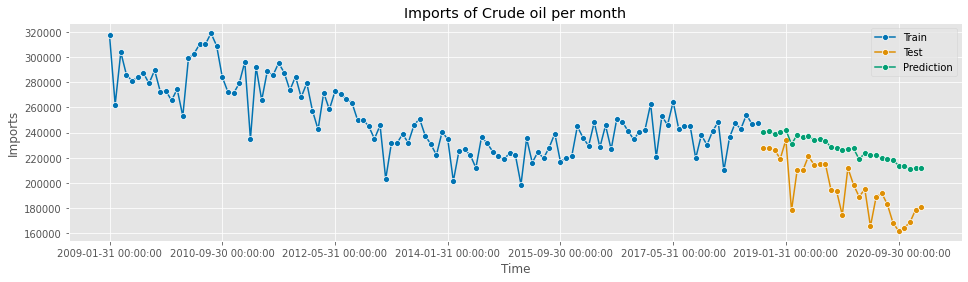

In [ ]:
plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, monthly_pred, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте метрики на test
MAE(monthly_pred, ts1_monthly_test.Imports.values)

30431.11230446969

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [ ]:
from orbit.diagnostics.plot import plot_predicted_data

In [ ]:
from orbit.models.lgt import LGTFull
from orbit.models.dlt import DLTFull

# ваш код обучения моделей здесь

In [ ]:
df_test = ts1_monthly_test.copy()
df_test['date'] = ts1_monthly_test.index
df_test.head()

,Imports,date
Date,,
2018-09-30,227795,2018-09-30
2018-10-31,227975,2018-10-31
2018-11-30,226251,2018-11-30
2018-12-31,219240,2018-12-31
2019-01-31,234307,2019-01-31


In [ ]:
df_train = ts1_monthly_train.copy()
df_train['date'] = ts1_monthly_train.index
df_train.head()

,Imports,date
Date,,
2009-01-31,317275,2009-01-31
2009-02-28,262339,2009-02-28
2009-03-31,303897,2009-03-31
2009-04-30,285934,2009-04-30
2009-05-31,281147,2009-05-31


In [ ]:
lgt = LGTFull(
    response_col = 'Imports',
    date_col = 'date',
    seasonality=12,
    seed=8888, 
    seasonality_sm_input = 0.7, 
)
lgt.fit(df_train)
predicted_df = lgt.predict(df_test)

In [ ]:
predicted_df = predicted_df.set_index('date')

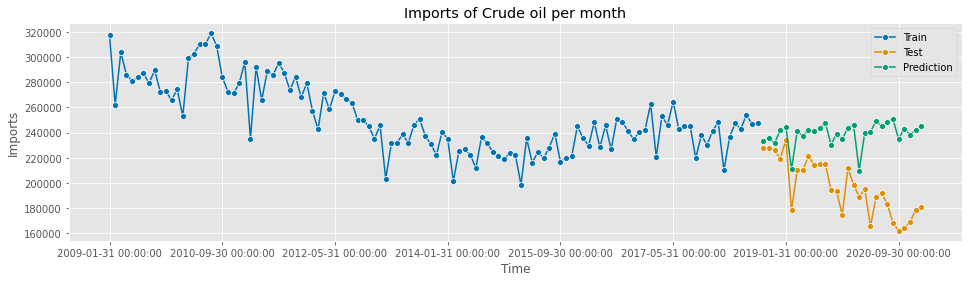

In [ ]:
plot_series(df_train.Imports, df_test.Imports, predicted_df.prediction, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
MAE(predicted_df.prediction, ts1_monthly_test.Imports.values)

42235.65604213527

In [ ]:
dlt = DLTFull(
    response_col = 'Imports',
    date_col = 'date',
    seasonality=12,
    global_trend_option='logistic'
)
dlt.fit(df_train)
predict = lgt.predict(df_test)
None

In [ ]:
predict = predict.set_index('date')

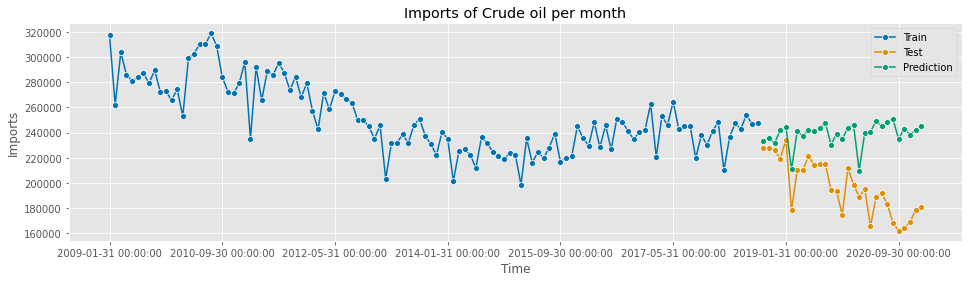

In [ ]:
plot_series(df_train.Imports, df_test.Imports, predict.prediction, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте метрики на test
MAE(predict.prediction, df_test.Imports.values)

42235.65604213527

### ETS (2 балла).

Обучите из библиотеки `sklearn` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь

In [ ]:
ETS = ExponentialSmoothing(
    trend='add', 
    seasonal='add', 
    sp=12, 
    use_boxcox = 0.3
)
ETS.fit(ts1_monthly_train.Imports)
monthly_pred = ETS.predict(fh=fh)
None

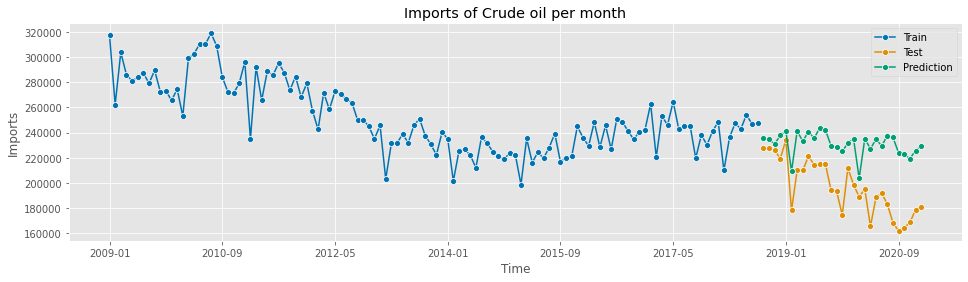

In [ ]:
plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, monthly_pred, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте метрики на test
MAE(monthly_pred, ts1_monthly_test.Imports.values)

34221.21470446579

In [ ]:
auto_ETS = AutoETS(
    error='add', 
    trend='add',
    seasonal='add',
    sp=12, 
    auto=True, 
    information_criterion='bic'
)
auto_ETS.fit(pd.Series(ts1_monthly_train.Imports, dtype='float64'))
monthly_pred = auto_ETS.predict(fh=fh)

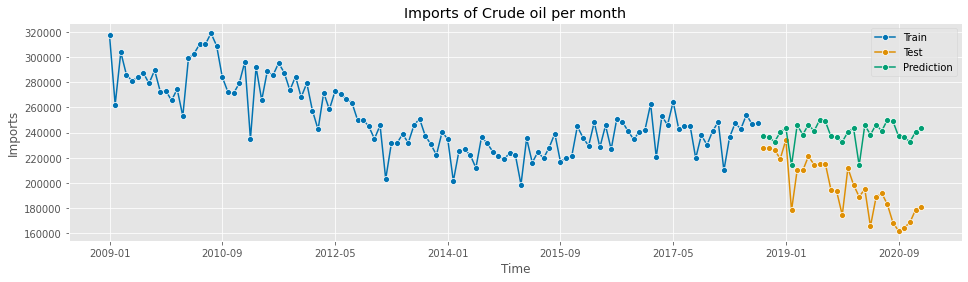

In [ ]:
plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, monthly_pred, labels=["Train", "Test", "Prediction"])
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
MAE(monthly_pred, ts1_monthly_test.Imports.values)

42435.13831159223

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [ ]:
# нарисуйте пресказания
# лучшая модель ARIMA(1,1,0)(1,0,1)[12] intercept

лучшая модель ARIMA(1,1,0)-(1,0,1,12) (MAE ~ 30620.859)

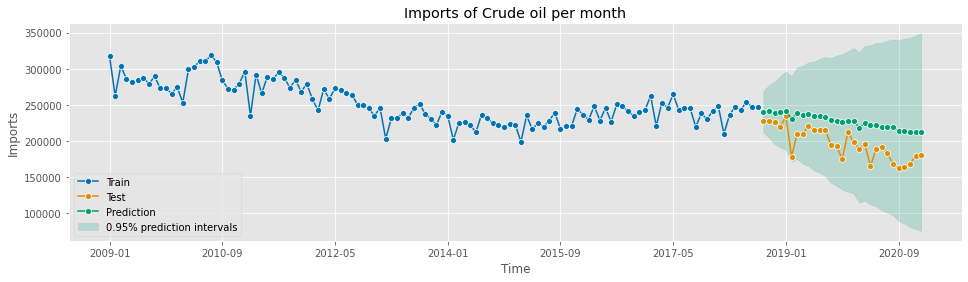

In [ ]:
best_model = ARIMA(
    order = (1,1,0),
    seasonal_order = (1,0,1,12)
)
best_model.fit(ts1_monthly_train.Imports)
monthly_pred, pred_ints = best_model.predict(fh=fh, return_pred_int=True, alpha=0.05)

fig, ax = plot_series(ts1_monthly_train.Imports, ts1_monthly_test.Imports, monthly_pred, labels=["Train", "Test", "Prediction"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - 0.05}% prediction intervals",
)
ax.legend(loc = "lower left")
plt.title('Imports of Crude oil per month')
plt.xlabel('Time')
plt.show()

In [ ]:
MAE(ts1_monthly_test.Imports.values, monthly_pred)

30620.85920216487

## Задание 4. Предсказание дневного временного ряда (2.5 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (0.5 балла).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
fh = ForecastingHorizon(ts2_daily_test.index, is_relative=False)
fh

ForecastingHorizon(['2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18',
               '2016-03-19', '2016-03-20', '2016-03-21', '2016-03-22',
               '2016-03-23', '2016-03-24',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=293, freq='D', is_relative=False)

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
nf1 = NaiveForecaster(
    strategy='last'
)
nf1.fit(ts2_daily_train.meantemp)
pred = nf1.predict(fh=fh)

<Figure size 1296x576 with 0 Axes>

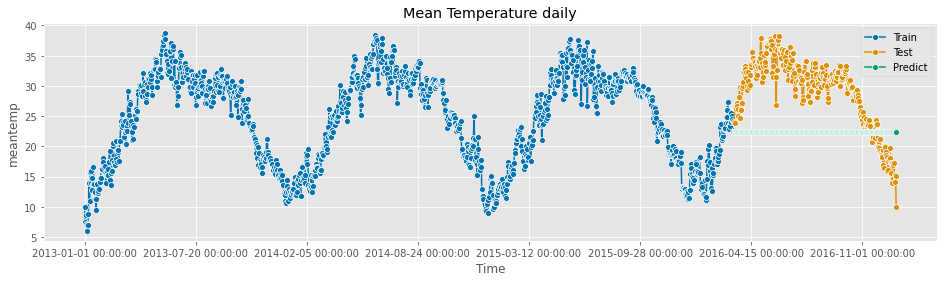

In [ ]:
plt.figure(figsize=(18, 8))
plot_series(ts2_daily_train.meantemp, ts2_daily_test.meantemp, pred, labels=["Train", "Test", 'Predict'])
plt.title('Mean Temperature daily')
plt.xlabel('Time')
plt.show()

In [ ]:
# посчитайте метрики на test
MAE(ts2_daily_test.meantemp, pred)

8.00058895958584

In [ ]:
nf2 = NaiveForecaster(
    strategy='last', 
    sp=365
)
nf2.fit(ts2_daily_train.meantemp)
pred = nf2.predict(fh=fh)

<Figure size 1296x576 with 0 Axes>

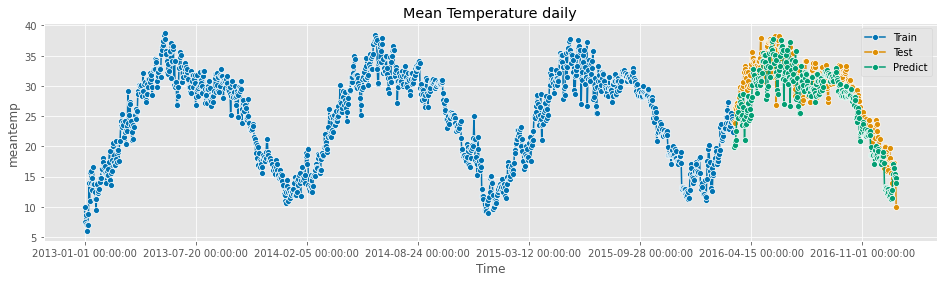

In [ ]:
plt.figure(figsize=(18, 8))
plot_series(ts2_daily_train.meantemp, ts2_daily_test.meantemp, pred, labels=["Train", "Test", 'Predict'])
plt.title('Mean Temperature daily')
plt.xlabel('Time')
plt.show()

In [ ]:
MAE(ts2_daily_test.meantemp, pred)

2.77738819597801

### KTR из orbit (1 балл).



In [ ]:
df_tr = ts2_daily_train.copy()
df_tr['Date'] = df_tr.index
df_ts = ts2_daily_test.copy()
df_ts['Date'] = df_ts.index

In [ ]:
from orbit.models.ktrlite import KTRLiteMAP

# ваш код обучения моделей здесь
ktrlite = KTRLiteMAP(
    response_col='meantemp',
    date_col='Date',
    # seasonality
    seasonality=[7, 31, 365.25],
    seasonality_fs_order=[2, 3, 4],
    level_knot_scale=.1,
    span_level=.05,
)
ktrlite.fit(df_tr)


In [ ]:
df_pred = ktrlite.predict(df=df_ts, decompose=True)
df_pred.head()

,Date,prediction_5,prediction,prediction_95,trend_5,trend,trend_95,seasonality_7_5,seasonality_7,seasonality_7_95,seasonality_31_5,seasonality_31,seasonality_31_95,seasonality_365.25_5,seasonality_365.25,seasonality_365.25_95
0,2016-03-15,20.592687,23.933200,27.248779,26.013457,26.083701,26.156194,0.127466,0.127466,0.127466,-0.062732,-0.062732,-0.062732,-2.215105,-2.215105,-2.215105
1,2016-03-16,20.694110,24.024974,27.394346,26.009562,26.083709,26.160229,0.135777,0.135777,0.135777,-0.144861,-0.144861,-0.144861,-2.049512,-2.049512,-2.049512
2,2016-03-17,20.704678,24.088749,27.495798,26.005667,26.083716,26.164263,0.060809,0.060809,0.060809,-0.171187,-0.171187,-0.171187,-1.884443,-1.884443,-1.884443
3,2016-03-18,20.774785,24.185028,27.535611,26.001772,26.083723,26.168298,-0.025776,-0.025776,-0.025776,-0.152976,-0.152976,-0.152976,-1.719790,-1.719790,-1.719790
4,2016-03-19,20.884898,24.283051,27.675289,25.997877,26.083730,26.172332,-0.127124,-0.127124,-0.127124,-0.117954,-0.117954,-0.117954,-1.555441,-1.555441,-1.555441


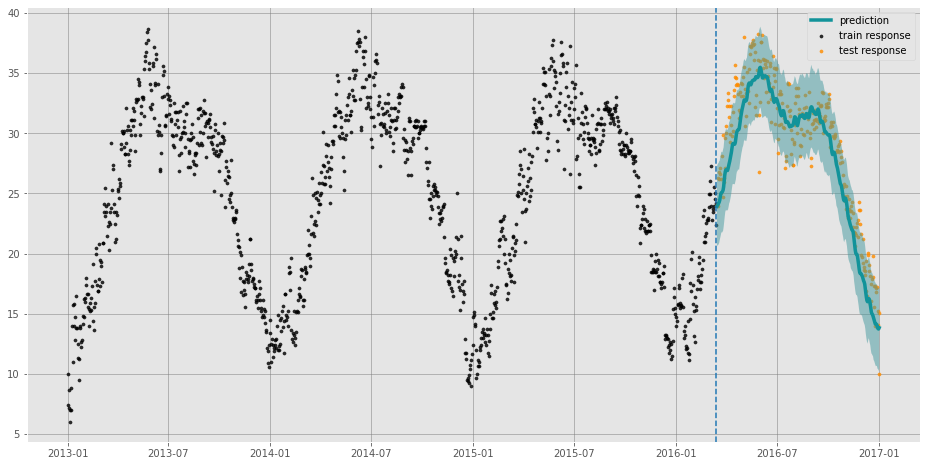

In [ ]:
_ = plot_predicted_data(training_actual_df=df_tr, predicted_df=df_pred,
                        date_col='Date', actual_col='meantemp',
                        test_actual_df=df_ts, markersize=40, lw=3.5)

In [ ]:
MAE(df_ts.meantemp, df_pred.prediction)

1.918301393429825

### Phophet (1 балл).



In [ ]:
df_ts.columns = ['y', 'ds']
df_tr.columns = ['y', 'ds']

In [ ]:
from prophet import Prophet

# ваш код обучения моделей здесь
ph = Prophet(
    daily_seasonality=True, 
    weekly_seasonality=True
)
ph.fit(df_tr)
future = ph.make_future_dataframe(periods=len(df_ts))
forecast = ph.predict(future)

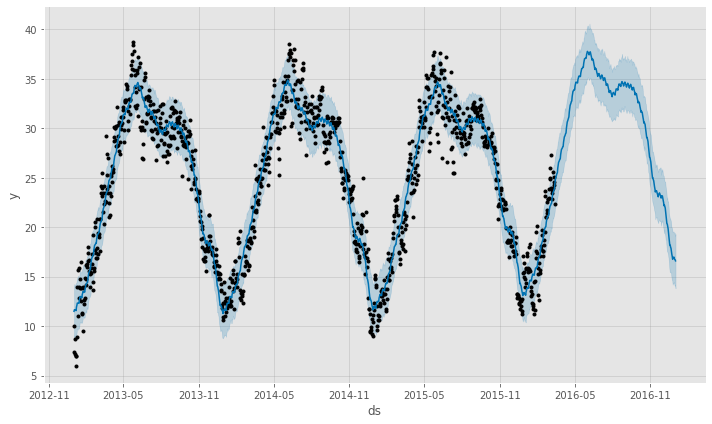

In [ ]:
fig1 = ph.plot(forecast)

In [ ]:
# посчитайте метрики на test
MAE(df_ts.y, forecast.yhat.iloc[-293:])

2.1820501366493312

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

Лучшая модель – KTRLiteMAP (MAE ~ 1.918)

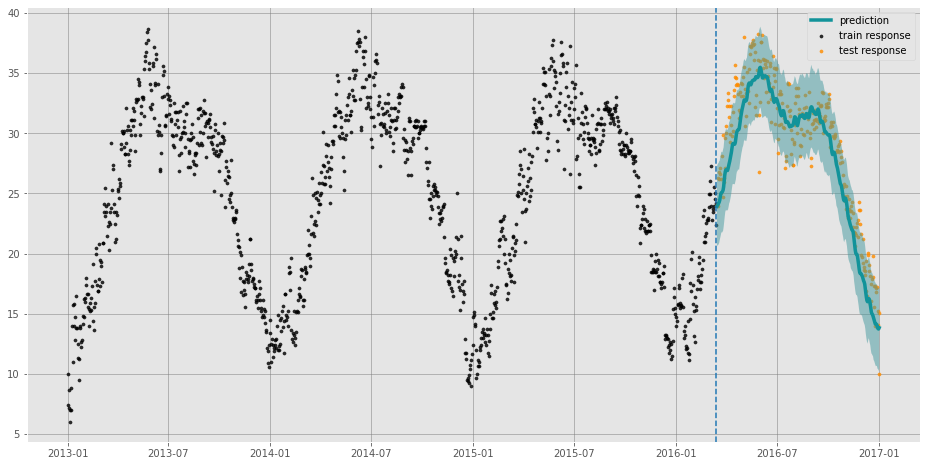

In [ ]:
_ = plot_predicted_data(training_actual_df=df_tr, predicted_df=df_pred,
                        date_col='Date', actual_col='meantemp',
                        test_actual_df=df_ts, markersize=40, lw=3.5)

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытай свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной на тестовой выборке с помощью MAE. 



In [ ]:
pip install -q pystan
!pip install -q nest_asyncio

In [14]:
import nest_asyncio
nest_asyncio.apply()

import stan

Опишем то, что будем делать:

1. создадим новый датасет $\bigtriangleup y_t = y_t - y_{t-1}$
2. Разобьем его на dtrain и dtest
3. Обучим модель на dtrain (используем МА(2) процесс), потом по найденым  $ \widehat{\bigtriangleup y_t }$ спрогнозируем $\widehat{ y_t }$
4. Пстроем графики для $\widehat{ y_t }$ и ${ y_t }$, оценим MAE($\widehat{ y_t }$, ${ y_t }$)

In [241]:
test_size = 29

delta = ts1_monthly.Imports.values[1:] - ts1_monthly.Imports.values[:-1]
print(f"Shape of data: {delta.shape[0]}")

dtrain = delta[:-test_size]
dtest = delta[-test_size:]
print(f'Shape of deltas:  Train-{dtrain.shape[0]}, Test-{dtest.shape[0]}')

train = ts1_monthly[1:-test_size]
test = ts1_monthly[-test_size:]
print(f'Shape of Imports: Train-{train.shape[0]}, Test-{test.shape[0]}')

Shape of data: 144
Shape of deltas:  Train-115, Test-29
Shape of Imports: Train-115, Test-29


In [195]:
model = """
data {
  int<lower=3> T;  // number of observations
  vector[T] dy;     // observation at time T
}
parameters {
  real mu;              // mean
  real<lower=0> sigma;  // error scale
  vector[2] theta;      // lag coefficients
}
transformed parameters {
  vector[T] epsilon;    // error terms
  epsilon[1] = dy[1] - mu;
  epsilon[2] = dy[2] - mu - theta[1] * epsilon[1];
  for (t in 3:T)
    epsilon[t] = (dy[t] - mu
                    - theta[1] * epsilon[t - 1]
                    - theta[2] * epsilon[t - 2] );
}
model {
  mu ~ cauchy(0, 2.5);
  theta ~ cauchy(0, 2.5);
  sigma ~ cauchy(0, 2.5);
  for (t in 3:T)
    dy[t] ~ normal(mu
                  + theta[1] * epsilon[t - 1]
                  + theta[2] * epsilon[t - 2],
                  sigma);
}"""

In [196]:
data = {
    'T': 115,
    'dy': dtrain
}
posterior = stan.build(model, data=data)
fit = posterior.sample(num_samples=1000)

lly, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is -inf, but must be finite! (in '/var/folders/pc/4112j_zx451_58mz9tnqpgr40000gn/T/httpstan_34yvmtrd/model_kcl6zw4z.stan', line 25, column 4 to line 28, column 25)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/var/folders/pc/4112j_zx451_58mz9

In [233]:
mu = params['mu'].mean()
sigma = params['sigma'].mean()
th1 = params['theta.1'].mean()
th2 = params['theta.2'].mean()
err1 = params['epsilon.114'].mean()
err2 = params['epsilon.115'].mean()
errs = [err1, err2]

Наша модель выглядит следующим образом:

$$    dy[t] \backsim \mathcal{N}(\mu+ \theta_1 * \epsilon_{t - 1} + \theta_2 * \epsilon_{t - 2}, \sigma)$$
$$ y[t] = y[t-1] + dy[t] $$

In [234]:
np.random.seed(44)
dpred = []
for i in range(2, 31):
    dy = np.random.normal(loc = mu + th1 * errs[i - 1] + th2 * errs[i - 2], scale = sigma)
    dpred += [dy]
    errs += [dy - dtest[i - 2]]
assert len(dpred) == 29

In [235]:
pred = [247656]
for dy in dpred:
    pred += [pred[-1] + dy]

pred = pred[1:]
assert len(pred) == 29

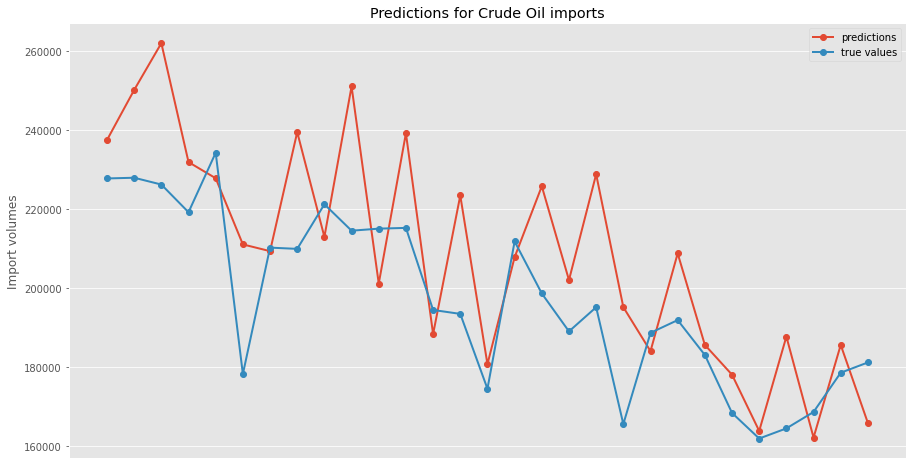

In [236]:
plt.figure(figsize=(15, 8))
plt.plot(np.array(pred), lw = 2, marker='o',  label='predictions')
plt.plot(test.Imports.values, lw = 2, marker='o',  label='true values')
plt.ylabel('Import volumes')
plt.xticks([])
plt.title('Predictions for Crude Oil imports')
plt.legend()
plt.show()

In [237]:
from sklearn.metrics import mean_absolute_error as MAE
MAE(test.Imports.values, np.array(pred))

16221.694491997838

Это знаительно более качественный прогноз по сравнению с наивным предсказанием (MAE_naive = 42235.656). Стоит также отметить, что это улчший результат среди всех моделей 